from https://github.com/NREL-Sienna/HydroPowerSimulations.jl/blob/2d9ef900769ae924e178edf6f20d0de4eed890eb/test/test_hydro_simulations.jl

In [1]:
using PowerSystems
using PowerSimulations
using HydroPowerSimulations
using PowerSystemCaseBuilder
using HiGHS
using Dates

In [49]:
# https://nrel-sienna.github.io/PowerSystems.jl/stable/how_to/powersystembuilder/
c_sys5_hyd = PowerSystemCaseBuilder.build_system(PowerSystemCaseBuilder.PSITestSystems, "c_sys5_phes_ed")

┌ Info: Deserializing with InMemoryTimeSeriesStorage is currently not supported. Using HDF
└ @ InfrastructureSystems /home/emco4286/.julia/packages/InfrastructureSystems/rXaFr/src/system_data.jl:831
┌ Info: Loaded time series from storage file existing=/home/emco4286/.julia/packages/PowerSystemCaseBuilder/uZO8H/data/serialized_system/614e094ea985a55912fc1321256a49b755f9fc451c0f264f24d6d04af20e84d7/c_sys5_phes_ed_time_series_storage.h5 new=/tmp/jl_3ErZHq compression=CompressionSettings(false, CompressionTypes.DEFLATE = 1, 3, true)
└ @ InfrastructureSystems /home/emco4286/.julia/packages/InfrastructureSystems/rXaFr/src/hdf5_time_series_storage.jl:110


Property,Value
Name,
Description,
System Units Base,SYSTEM_BASE
Base Power,100.0
Base Frequency,60.0
Num Components,30
Type,Count
ACBus,5
Arc,6
HydroPumpedStorage,1


In [3]:
show_time_series(c_sys5_hyd)

Time Series Summary
┌────────────────────────┬────────────────┬──────────────────┬──────────────────────┬─────────────────────┬───────────────┬───────┐
│ owner_type             │ owner_category │ time_series_type │ time_series_category │ initial_timestamp   │ resolution_ms │ count │
│ String                 │ String         │ String           │ String               │ String              │ Int64         │ Int64 │
├────────────────────────┼────────────────┼──────────────────┼──────────────────────┼─────────────────────┼───────────────┼───────┤
│ HydroPumpedStorage     │ Component      │ Deterministic    │ Forecast             │ 2024-01-01T00:00:00 │ 300000        │ 4     │
│ InterruptiblePowerLoad │ Component      │ Deterministic    │ Forecast             │ 2024-01-01T00:00:00 │ 300000        │ 1     │
│ PowerLoad              │ Component      │ Deterministic    │ Forecast             │ 2024-01-01T00:00:00 │ 300000        │ 3     │
│ RenewableDispatch      │ Component      │ Deterministi

Look at load

In [25]:
show_components(PowerLoad, c_sys5_hyd)

PowerLoad
┌──────┬───────────┐
│ name │ available │
├──────┼───────────┤
│ Bus2 │ true      │
│ Bus3 │ true      │
│ Bus4 │ true      │
└──────┴───────────┘


In [27]:
retrieved_component = get_component(PowerLoad, c_sys5_hyd, "Bus2")

PowerLoad: Bus2:
   name: Bus2
   available: true
   bus: ACBus: nodeB
   active_power: 3.0
   reactive_power: 0.9861
   base_power: 100.0
   max_active_power: 3.0
   max_reactive_power: 0.9861
   services: 0-element Vector{Service}
   dynamic_injector: nothing
   ext: Dict{String, Any}()
   InfrastructureSystems.SystemUnitsSettings:
      base_value: 100.0
      unit_system: UnitSystem.SYSTEM_BASE = 0
   has_supplemental_attributes: false
   has_time_series: true

In [28]:
show_time_series(retrieved_component)

┌──────────────────┬──────────────────┬─────────────────────┬─────────────────────┬──────────────────────┬──────────────────────┬───────┬─────────────────────┐
│ time_series_type │             name │   initial_timestamp │          resolution │              horizon │             interval │ count │            features │
│           String │           String │            DateTime │         Millisecond │          Millisecond │          Millisecond │ Int64 │   Dict{String, Any} │
├──────────────────┼──────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┼───────┼─────────────────────┤
│    Deterministic │ max_active_power │ 2024-01-01T00:00:00 │ 300000 milliseconds │ 3600000 milliseconds │ 3600000 milliseconds │    48 │ Dict{String, Any}() │
└──────────────────┴──────────────────┴─────────────────────┴─────────────────────┴──────────────────────┴──────────────────────┴───────┴─────────────────────┘


In [29]:
max_active_power = get_time_series_array(Deterministic, retrieved_component, "max_active_power")

12×1 TimeSeries.TimeArray{Float64, 1, DateTime, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}} 2024-01-01T00:00:00 to 2024-01-01T00:55:00
┌─────────────────────┬─────────┐
│                     │ A       │
├─────────────────────┼─────────┤
│ 2024-01-01T00:00:00 │ 0.79273 │
│ 2024-01-01T00:05:00 │ 0.79273 │
│ 2024-01-01T00:10:00 │ 0.79273 │
│ 2024-01-01T00:15:00 │ 0.79273 │
│ 2024-01-01T00:20:00 │ 0.79273 │
│ 2024-01-01T00:25:00 │ 0.79273 │
│ 2024-01-01T00:30:00 │ 0.79273 │
│ 2024-01-01T00:35:00 │ 0.79273 │
│ 2024-01-01T00:40:00 │ 0.79273 │
│ 2024-01-01T00:45:00 │ 0.79273 │
│ 2024-01-01T00:50:00 │ 0.79273 │
│ 2024-01-01T00:55:00 │ 0.79273 │
└─────────────────────┴─────────┘

Look at HydroPumpedStorage

In [7]:
retrieved_component = get_component(HydroPumpedStorage, c_sys5_hyd, "HydroPumpedStorage")

HydroPumpedStorage: HydroPumpedStorage:
   name: HydroPumpedStorage
   available: true
   bus: ACBus: nodeC
   active_power: 0.0
   reactive_power: 0.0
   rating: 0.5
   base_power: 50.0
   prime_mover_type: PrimeMovers.HY = 16
   active_power_limits: (min = 0.0, max = 0.5)
   reactive_power_limits: (min = 0.0, max = 0.5)
   ramp_limits: (up = 0.05, down = 0.05)
   time_limits: nothing
   rating_pump: 0.5
   active_power_limits_pump: (min = 0.0, max = 0.5)
   reactive_power_limits_pump: nothing
   ramp_limits_pump: (up = 0.5, down = 0.5)
   time_limits_pump: nothing
   storage_capacity: (up = 1.0, down = 1.0)
   inflow: 0.0
   outflow: 0.0
   initial_storage: (up = 0.0, down = 0.0)
   storage_target: (up = 0.0, down = 0.0)
   operation_cost: HydroGenerationCost composed of variable: CostCurve{LinearCurve}
   pump_efficiency: 0.8
   conversion_factor: 1.0
   status: PowerSystems.PumpHydroStatusModule.PumpHydroStatus.OFF = 0
   time_at_status: 10000.0
   services: 0-element Vector{Servic

In [8]:
show_time_series(retrieved_component)

┌──────────────────┬──────────────────┬─────────────────────┬─────────────────────┬──────────────────────┬──────────────────────┬───────┬─────────────────────┐
│ time_series_type │             name │   initial_timestamp │          resolution │              horizon │             interval │ count │            features │
│           String │           String │            DateTime │         Millisecond │          Millisecond │          Millisecond │ Int64 │   Dict{String, Any} │
├──────────────────┼──────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┼───────┼─────────────────────┤
│    Deterministic │           inflow │ 2024-01-01T00:00:00 │ 300000 milliseconds │ 3600000 milliseconds │ 3600000 milliseconds │    48 │ Dict{String, Any}() │
│    Deterministic │ max_active_power │ 2024-01-01T00:00:00 │ 300000 milliseconds │ 3600000 milliseconds │ 3600000 milliseconds │    48 │ Dict{String, Any}() │
│    Deterministic │          outflow │ 

In [13]:
inflow = get_time_series_array(Deterministic, retrieved_component, "inflow")

12×1 TimeSeries.TimeArray{Float64, 1, DateTime, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}} 2024-01-01T00:00:00 to 2024-01-01T00:55:00
┌─────────────────────┬─────────┐
│                     │ A       │
├─────────────────────┼─────────┤
│ 2024-01-01T00:00:00 │ 0.25144 │
│ 2024-01-01T00:05:00 │ 0.25144 │
│ 2024-01-01T00:10:00 │ 0.25144 │
│ 2024-01-01T00:15:00 │ 0.25144 │
│ 2024-01-01T00:20:00 │ 0.25144 │
│ 2024-01-01T00:25:00 │ 0.25144 │
│ 2024-01-01T00:30:00 │ 0.25144 │
│ 2024-01-01T00:35:00 │ 0.25144 │
│ 2024-01-01T00:40:00 │ 0.25144 │
│ 2024-01-01T00:45:00 │ 0.25144 │
│ 2024-01-01T00:50:00 │ 0.25144 │
│ 2024-01-01T00:55:00 │ 0.25144 │
└─────────────────────┴─────────┘

In [22]:
outflow = get_time_series_array(Deterministic, retrieved_component, "outflow")

12×1 TimeSeries.TimeArray{Float64, 1, DateTime, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}} 2024-01-01T00:00:00 to 2024-01-01T00:55:00
┌─────────────────────┬─────────┐
│                     │ A       │
├─────────────────────┼─────────┤
│ 2024-01-01T00:00:00 │ 0.25144 │
│ 2024-01-01T00:05:00 │ 0.25144 │
│ 2024-01-01T00:10:00 │ 0.25144 │
│ 2024-01-01T00:15:00 │ 0.25144 │
│ 2024-01-01T00:20:00 │ 0.25144 │
│ 2024-01-01T00:25:00 │ 0.25144 │
│ 2024-01-01T00:30:00 │ 0.25144 │
│ 2024-01-01T00:35:00 │ 0.25144 │
│ 2024-01-01T00:40:00 │ 0.25144 │
│ 2024-01-01T00:45:00 │ 0.25144 │
│ 2024-01-01T00:50:00 │ 0.25144 │
│ 2024-01-01T00:55:00 │ 0.25144 │
└─────────────────────┴─────────┘

In [14]:
storage_capacity = get_time_series_array(Deterministic, retrieved_component, "storage_capacity")

12×1 TimeSeries.TimeArray{Float64, 1, DateTime, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}} 2024-01-01T00:00:00 to 2024-01-01T00:55:00
┌─────────────────────┬────────┐
│                     │ A      │
├─────────────────────┼────────┤
│ 2024-01-01T00:00:00 │ 0.3143 │
│ 2024-01-01T00:05:00 │ 0.3143 │
│ 2024-01-01T00:10:00 │ 0.3143 │
│ 2024-01-01T00:15:00 │ 0.3143 │
│ 2024-01-01T00:20:00 │ 0.3143 │
│ 2024-01-01T00:25:00 │ 0.3143 │
│ 2024-01-01T00:30:00 │ 0.3143 │
│ 2024-01-01T00:35:00 │ 0.3143 │
│ 2024-01-01T00:40:00 │ 0.3143 │
│ 2024-01-01T00:45:00 │ 0.3143 │
│ 2024-01-01T00:50:00 │ 0.3143 │
│ 2024-01-01T00:55:00 │ 0.3143 │
└─────────────────────┴────────┘

In [15]:
max_active_power = get_time_series_array(Deterministic, retrieved_component, "max_active_power")

12×1 TimeSeries.TimeArray{Float64, 1, DateTime, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}} 2024-01-01T00:00:00 to 2024-01-01T00:55:00
┌─────────────────────┬────────┐
│                     │ A      │
├─────────────────────┼────────┤
│ 2024-01-01T00:00:00 │ 0.3143 │
│ 2024-01-01T00:05:00 │ 0.3143 │
│ 2024-01-01T00:10:00 │ 0.3143 │
│ 2024-01-01T00:15:00 │ 0.3143 │
│ 2024-01-01T00:20:00 │ 0.3143 │
│ 2024-01-01T00:25:00 │ 0.3143 │
│ 2024-01-01T00:30:00 │ 0.3143 │
│ 2024-01-01T00:35:00 │ 0.3143 │
│ 2024-01-01T00:40:00 │ 0.3143 │
│ 2024-01-01T00:45:00 │ 0.3143 │
│ 2024-01-01T00:50:00 │ 0.3143 │
│ 2024-01-01T00:55:00 │ 0.3143 │
└─────────────────────┴────────┘

Run the model

In [18]:
template_ed = ProblemTemplate(CopperPlatePowerModel)
set_device_model!(template_ed, PowerLoad, StaticPowerLoad)
set_device_model!(template_ed, ThermalStandard, ThermalBasicUnitCommitment)
set_device_model!(template_ed, HydroPumpedStorage, HydroDispatchPumpedStorage)
solver = optimizer_with_attributes(HiGHS.Optimizer, "mip_rel_gap" => 0.5)

model = DecisionModel(
    template_ed,
    c_sys5_hyd,
    name="ED",
    optimizer=solver,
    optimizer_solve_log_print=true,
    store_variable_names=true,
)

┌ Info: Overriding time_series_cache_size because time series is stored in memory
└ @ PowerSimulations /home/emco4286/.julia/packages/PowerSimulations/qdSY6/src/core/settings.jl:48


Network Model
┌───────────────┬───────────────────────┐
│ Network Model │ CopperPlatePowerModel │
│ Slacks        │ false                 │
│ PTDF          │ false                 │
│ Duals         │ None                  │
└───────────────┴───────────────────────┘

Device Models
┌────────────────────┬────────────────────────────┬────────┐
│ Device Type        │ Formulation                │ Slacks │
├────────────────────┼────────────────────────────┼────────┤
│ HydroPumpedStorage │ HydroDispatchPumpedStorage │ false  │
│ ThermalStandard    │ ThermalBasicUnitCommitment │ false  │
│ PowerLoad          │ StaticPowerLoad            │ false  │
└────────────────────┴────────────────────────────┴────────┘

In [20]:
build!(model, output_dir = mktempdir())

InfrastructureSystems.Optimization.ModelBuildStatusModule.ModelBuildStatus.BUILT = 0

In [21]:
solve!(model)

Running HiGHS 1.8.0 (git hash: fcfb534146): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [8e-02, 6e+00]
  Cost   [8e-01, 3e+02]
  Bound  [4e-01, 6e+00]
  RHS    [5e-01, 8e+00]
Assessing feasibility of MIP using primal feasibility and integrality tolerance of       1e-06
Solution has               num          max          sum
Col     infeasibilities      0            0            0
Integer infeasibilities      0            0            0
Row     infeasibilities     12       0.3433         4.12
Row     residuals            0            0            0
Attempting to find feasible solution by solving LP for user-supplied values of discrete variables
Coefficient ranges:
  Matrix [8e-02, 6e+00]
  Cost   [8e-01, 3e+02]
  Bound  [4e-01, 6e+00]
  RHS    [5e-01, 8e+00]
Presolving model
132 rows, 108 cols, 262 nonzeros  0s
24 rows, 48 cols, 94 nonzeros  0s
Presolve : Reductions: rows 24(-300); columns 48(-264); elements 94(-775)
Solving the presolved LP
Solving th

InfrastructureSystems.Simulation.RunStatusModule.RunStatus.SUCCESSFULLY_FINALIZED = 0

In [31]:
res = OptimizationProblemResults(model)

HydroEnergyOutput__HydroPumpedStorage
ProductionCostExpression__ThermalStandard
ProductionCostExpression__HydroPumpedStorage
ActivePowerBalance__System
OutflowTimeSeriesParameter__HydroPumpedStorage
InflowTimeSeriesParameter__HydroPumpedStorage
ActivePowerTimeSeriesParameter__PowerLoad
StopVariable__ThermalStandard
ActivePowerInVariable__HydroPumpedStorage
HydroEnergyVariableUp__HydroPumpedStorage
StartVariable__ThermalStandard


In [36]:
list_parameter_names(res)

3-element Vector{String}:
 "OutflowTimeSeriesParameter__HydroPumpedStorage"
 "InflowTimeSeriesParameter__HydroPumpedStorage"
 "ActivePowerTimeSeriesParameter__PowerLoad"

In [37]:
read_parameter(res, "ActivePowerTimeSeriesParameter__PowerLoad")

Row,DateTime,Bus2,Bus3,Bus4
,DateTime,Float64,Float64,Float64
1,2024-01-01T00:00:00,-237.819,-249.328,-348.519
2,2024-01-01T00:05:00,-237.819,-249.328,-348.519
3,2024-01-01T00:10:00,-237.819,-249.328,-348.519
4,2024-01-01T00:15:00,-237.819,-249.328,-348.519
5,2024-01-01T00:20:00,-237.819,-249.328,-348.519
6,2024-01-01T00:25:00,-237.819,-249.328,-348.519
7,2024-01-01T00:30:00,-237.819,-249.328,-348.519
8,2024-01-01T00:35:00,-237.819,-249.328,-348.519
9,2024-01-01T00:40:00,-237.819,-249.328,-348.519


In [38]:
read_parameter(res, "InflowTimeSeriesParameter__HydroPumpedStorage")

Row,DateTime,HydroPumpedStorage
,DateTime,Float64
1,2024-01-01T00:00:00,0.0
2,2024-01-01T00:05:00,0.0
3,2024-01-01T00:10:00,0.0
4,2024-01-01T00:15:00,0.0
5,2024-01-01T00:20:00,0.0
6,2024-01-01T00:25:00,0.0
7,2024-01-01T00:30:00,0.0
8,2024-01-01T00:35:00,0.0
9,2024-01-01T00:40:00,0.0


In [39]:
read_parameter(res, "OutflowTimeSeriesParameter__HydroPumpedStorage")

Row,DateTime,HydroPumpedStorage
,DateTime,Float64
1,2024-01-01T00:00:00,0.0
2,2024-01-01T00:05:00,0.0
3,2024-01-01T00:10:00,0.0
4,2024-01-01T00:15:00,0.0
5,2024-01-01T00:20:00,0.0
6,2024-01-01T00:25:00,0.0
7,2024-01-01T00:30:00,0.0
8,2024-01-01T00:35:00,0.0
9,2024-01-01T00:40:00,0.0


In [34]:
read_variables(res)

Dict{String, DataFrames.DataFrame} with 10 entries:
  "HydroEnergyVariableUp__… => 12×2 DataFrame…
  "StartVariable__ThermalS… => 12×6 DataFrame…
  "ReservationVariable__Hy… => 12×2 DataFrame…
  "ActivePowerVariable__Th… => 12×6 DataFrame…
  "WaterSpillageVariable__… => 12×2 DataFrame…
  "StopVariable__ThermalSt… => 12×6 DataFrame…
  "HydroEnergyVariableDown… => 12×2 DataFrame…
  "ActivePowerInVariable__… => 12×2 DataFrame…
  "OnVariable__ThermalStan… => 12×6 DataFrame…
  "ActivePowerOutVariable_… => 12×2 DataFrame…

In [43]:
using PowerAnalytics
using PowerGraphics

In [41]:
gen = get_generation_data(res)

PowerAnalytics.PowerData(Dict{Symbol, DataFrames.DataFrame}(:ActivePowerVariable__ThermalStandard => 12×6 DataFrame
 Row │ DateTime             Solitude  Park City  Alta     Brighton  Sundance 
     │ DateTime             Float64   Float64    Float64  Float64   Float64  
─────┼───────────────────────────────────────────────────────────────────────
   1 │ 2024-01-01T00:00:00   235.666       -0.0     -0.0     600.0      -0.0
   2 │ 2024-01-01T00:05:00   235.666       -0.0     -0.0     600.0      -0.0
   3 │ 2024-01-01T00:10:00   235.666       -0.0     -0.0     600.0      -0.0
   4 │ 2024-01-01T00:15:00   235.666       -0.0     -0.0     600.0      -0.0
   5 │ 2024-01-01T00:20:00   235.666       -0.0     -0.0     600.0      -0.0
   6 │ 2024-01-01T00:25:00   235.666       -0.0     -0.0     600.0      -0.0
   7 │ 2024-01-01T00:30:00   235.666       -0.0     -0.0     600.0      -0.0
   8 │ 2024-01-01T00:35:00   235.666       -0.0     -0.0     600.0      -0.0
   9 │ 2024-01-01T00:40:00   235.6

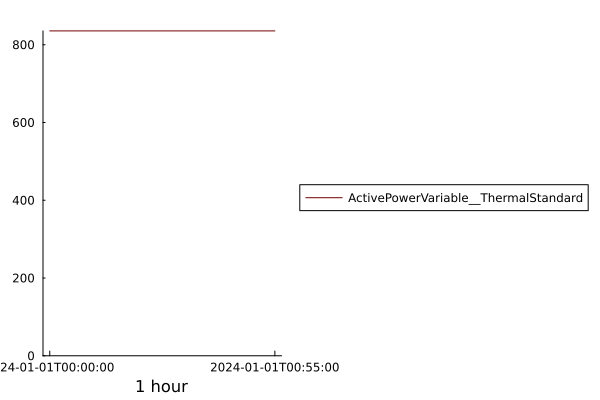

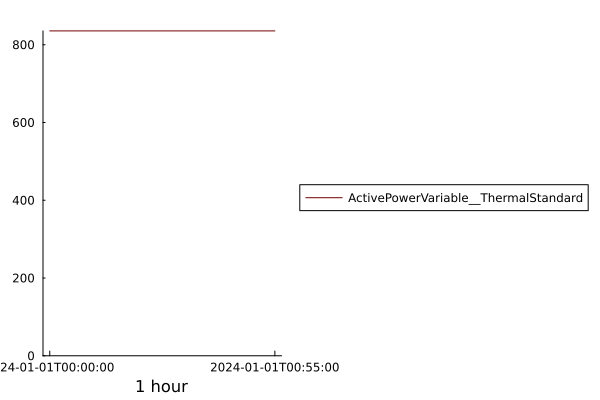

In [44]:
plot_powerdata(gen)

In [48]:
PowerAnalytics.get_storage_variable_keys(res)

InfrastructureSystems.Optimization.OptimizationContainerKey[]